<a href="https://colab.research.google.com/github/nse4real/StandardBank-CreditHomeLoans/blob/main/Credit_Home_Loans%2C_AutoML_VS_Bespoke_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARY**

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
!pip uninstall scikit-learn==1.0.2
!pip install scikit-learn==0.24.0
!pip install yellowbrick==1.0
!pip install sweetviz
!pip install auto-sklearn

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/scikit_learn-1.0.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.8/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.24.0-cp38-cp38-manylinux2010_x86_64.whl (24.9 MB)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz
import autosklearn
!pip install scikit-learn==1.0.2
import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**IMPORT DATASETS**

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Forage_internship/standard_bank/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Forage_internship/standard_bank/test.csv')

**PART ONE**

**EDA**

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
n = train.shape[0]
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Sweetviz**

                                             |          | [  0%]   00:00 -> (? left)


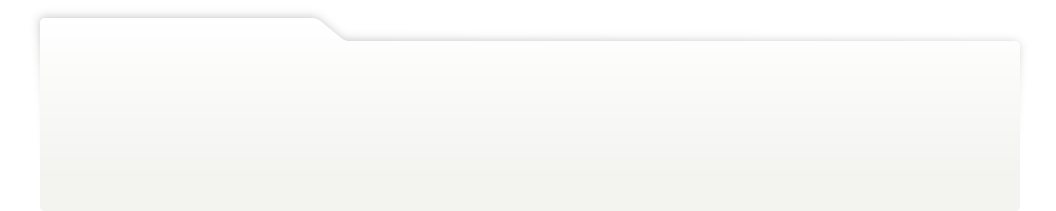
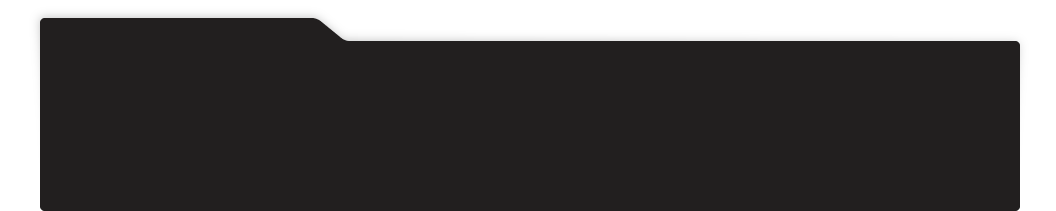
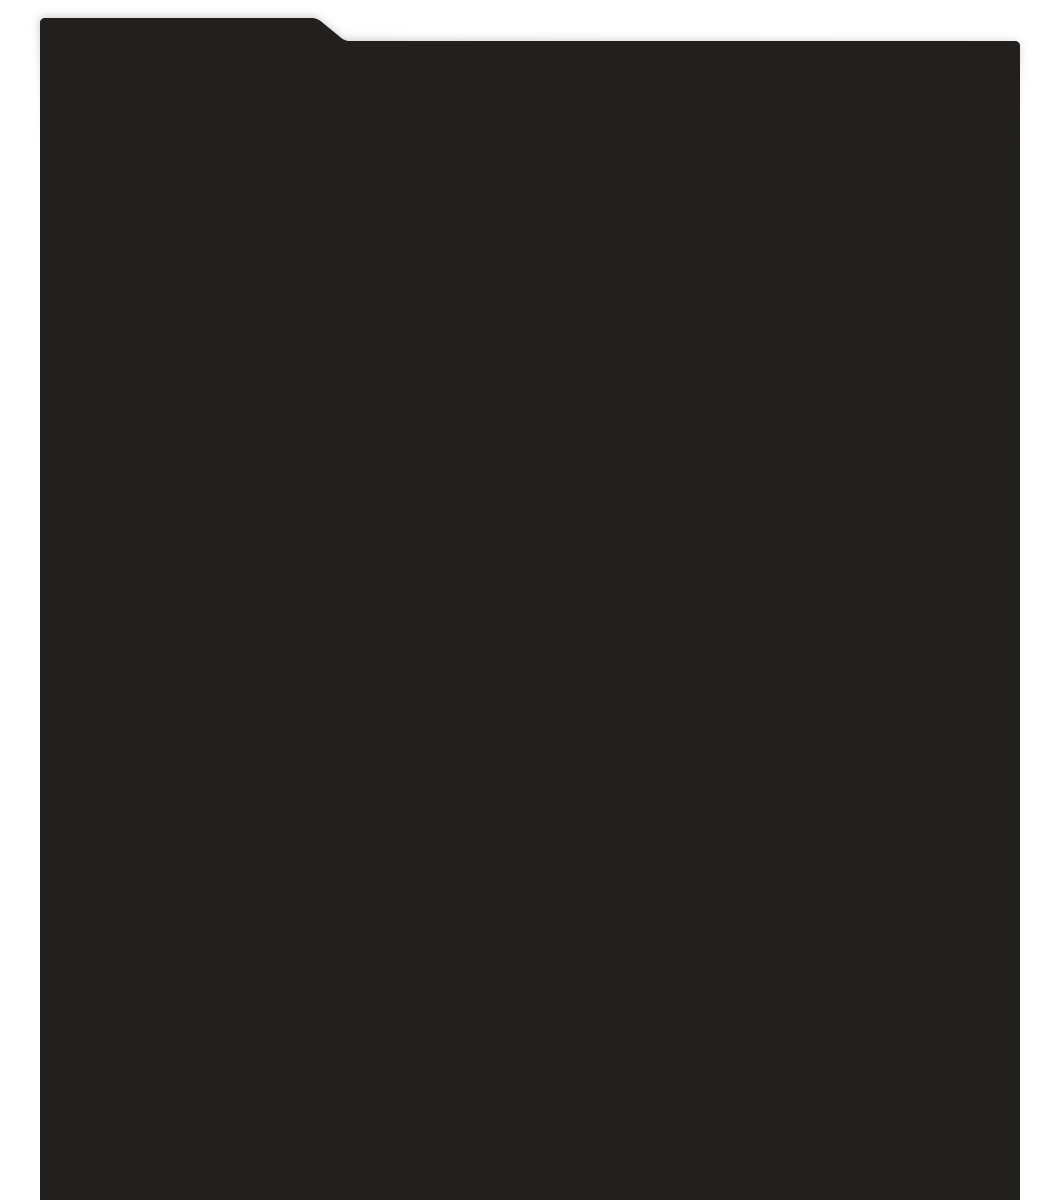
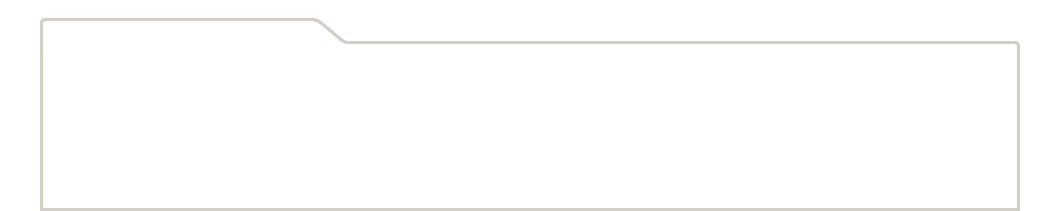
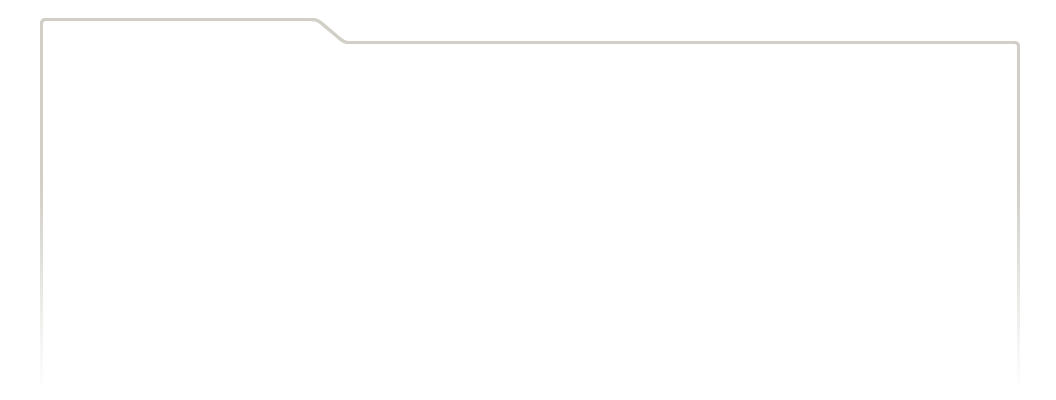
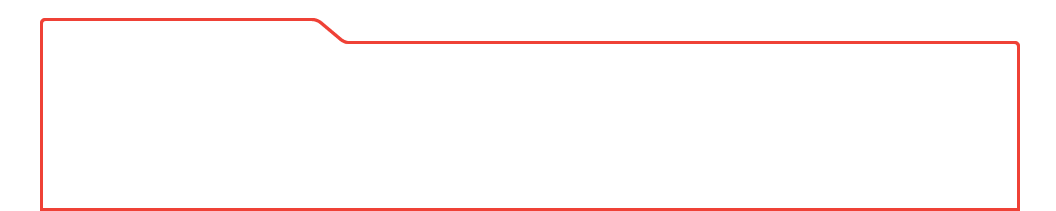
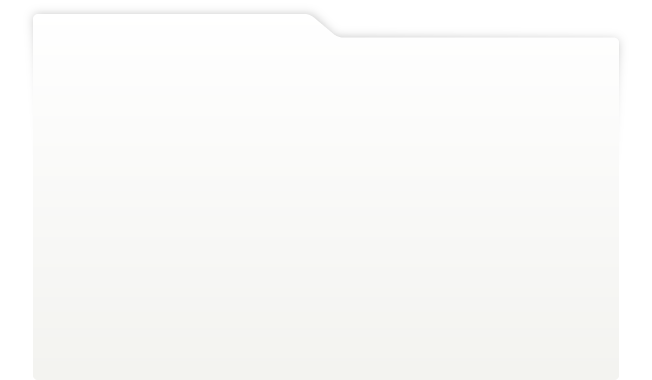
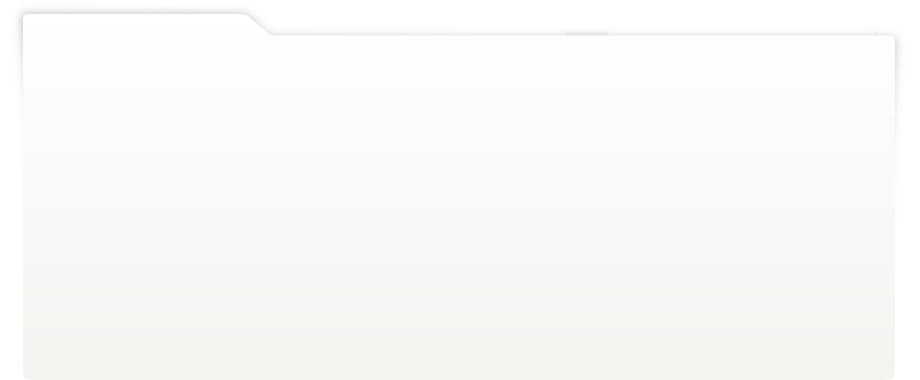
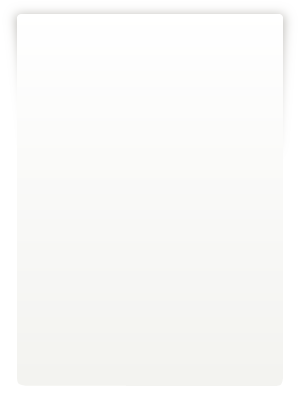
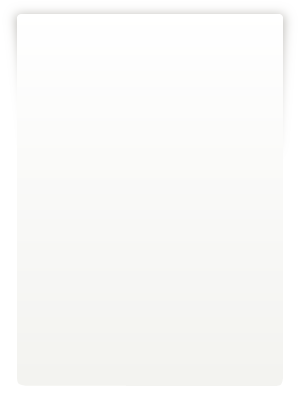
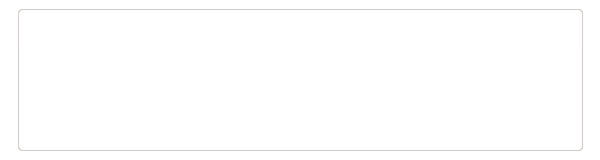
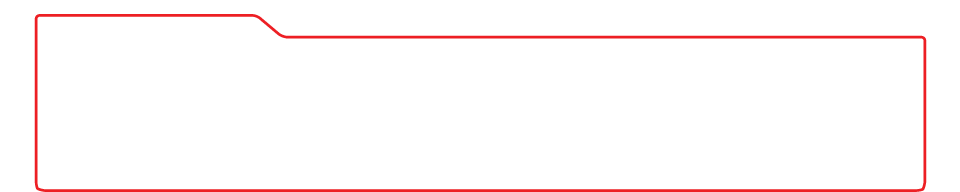
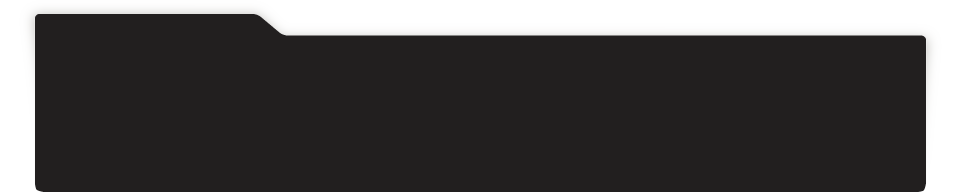
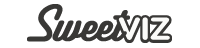
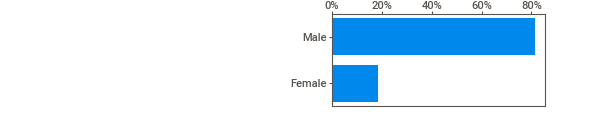
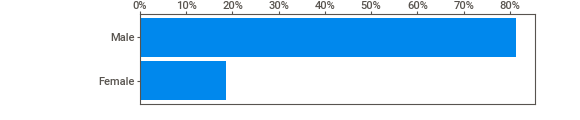
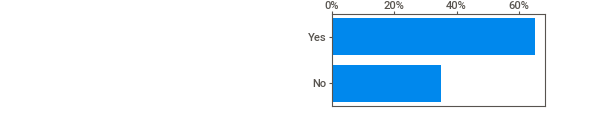
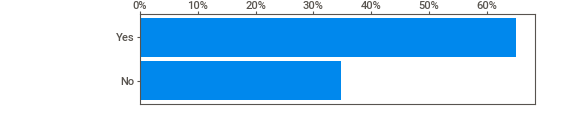
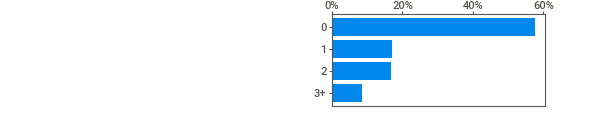
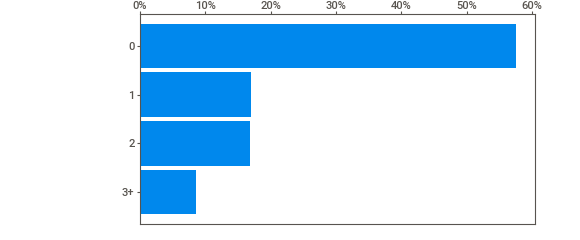
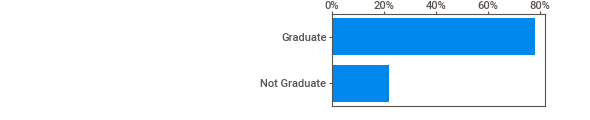
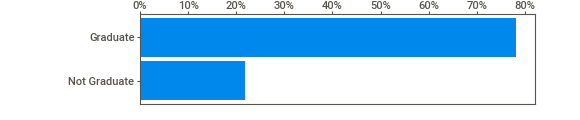
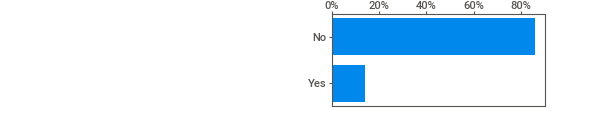
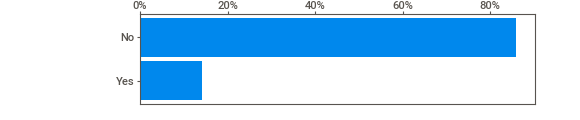
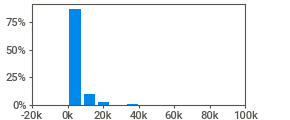
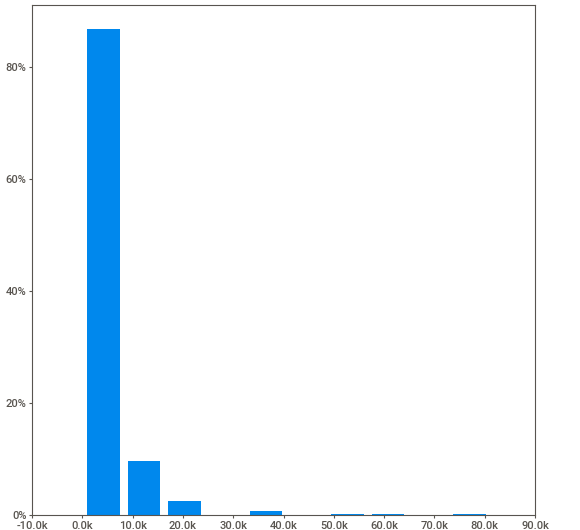
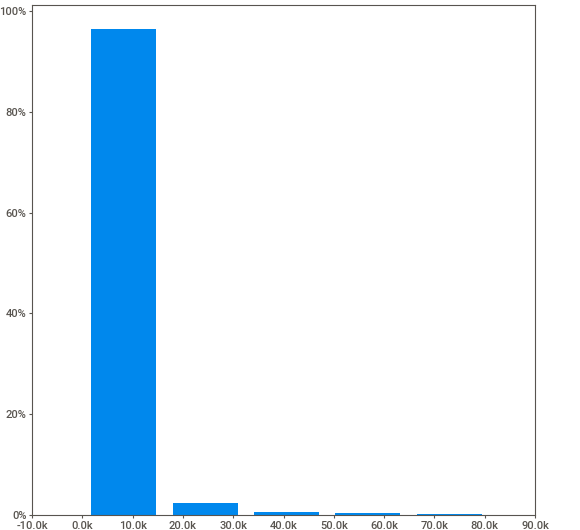
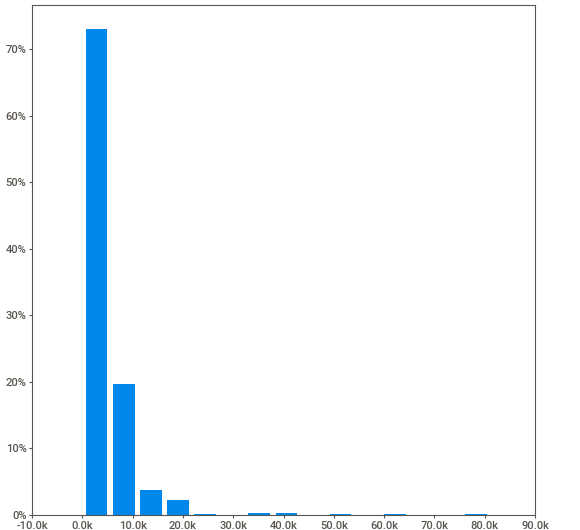
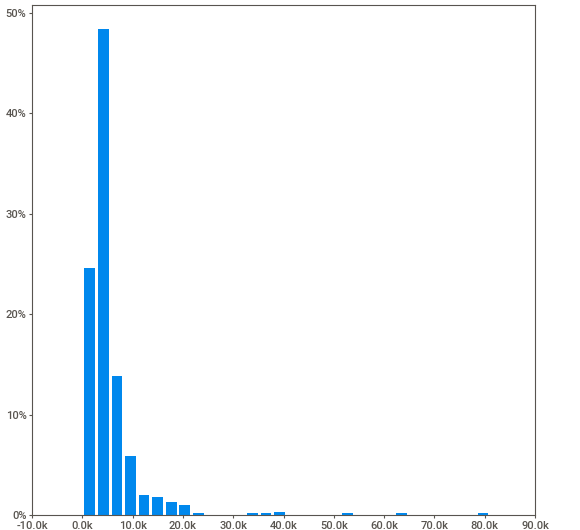
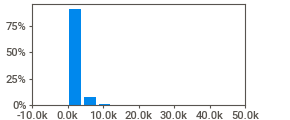
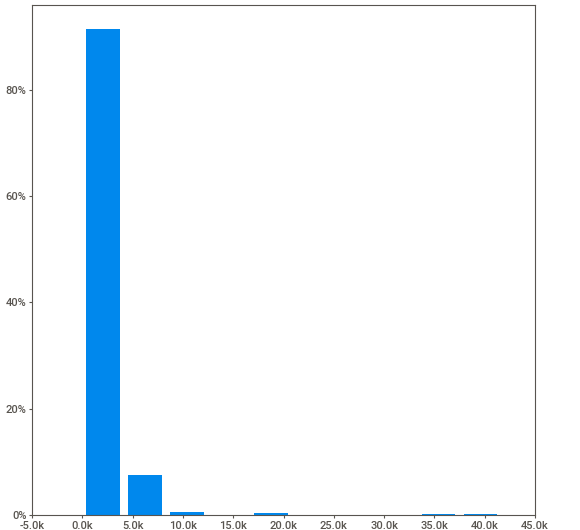
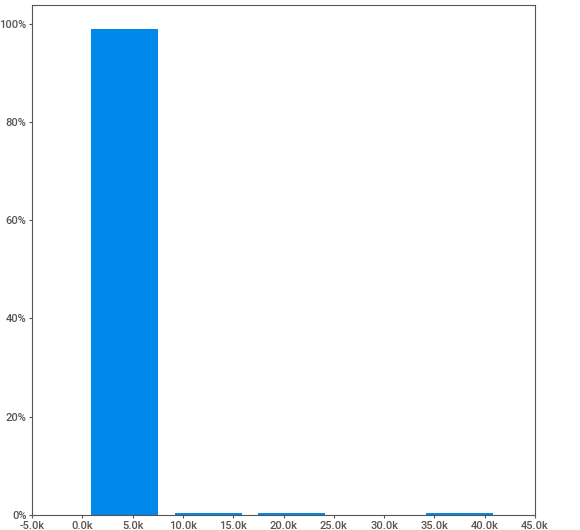
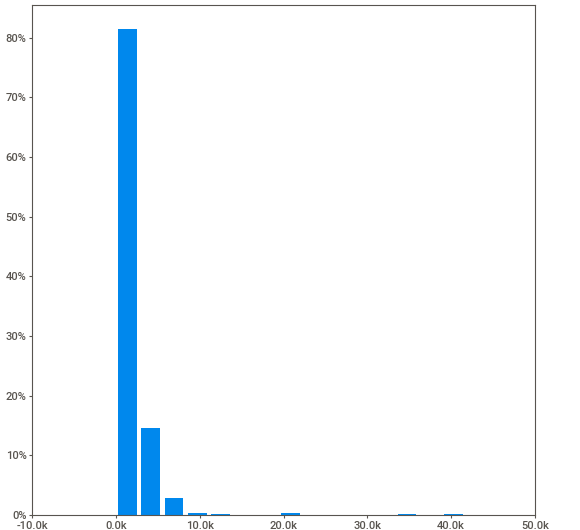
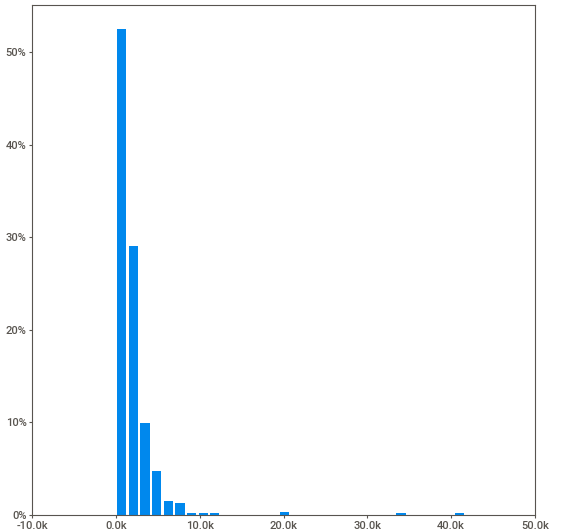
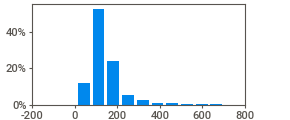
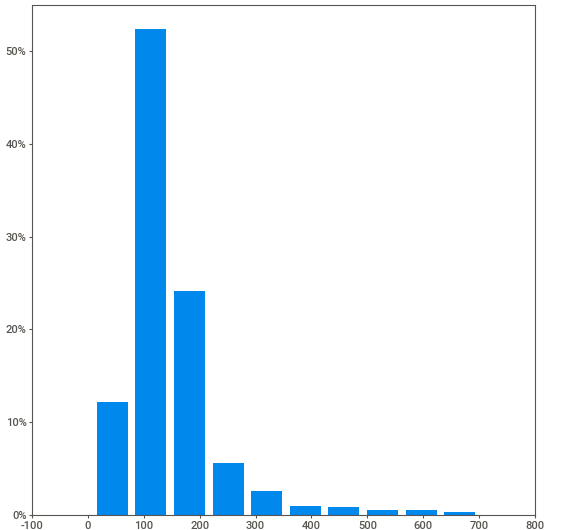
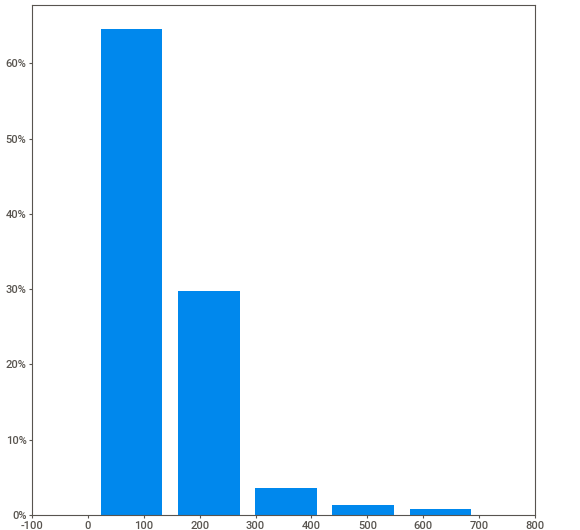
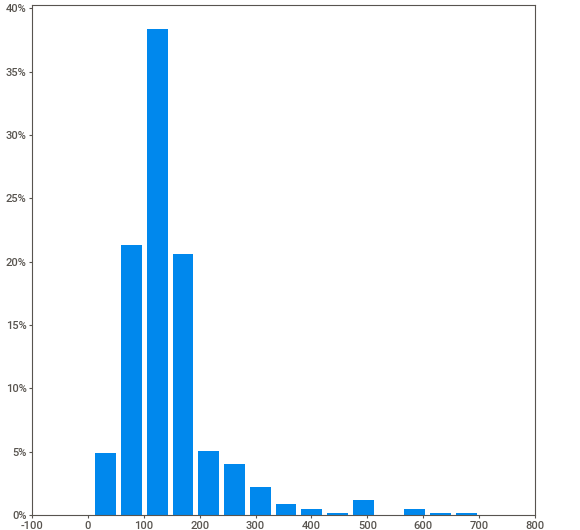
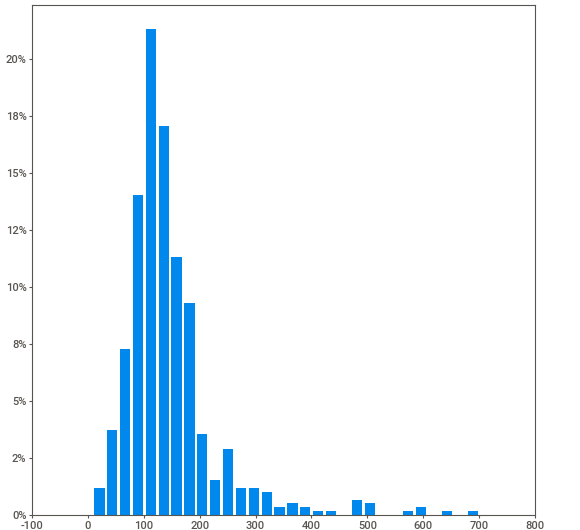
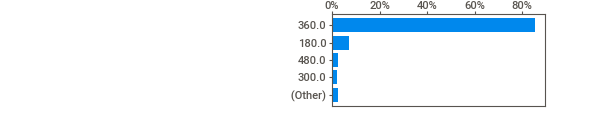
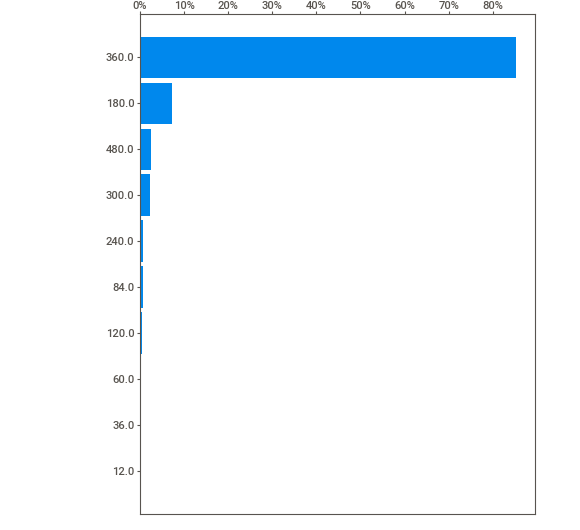
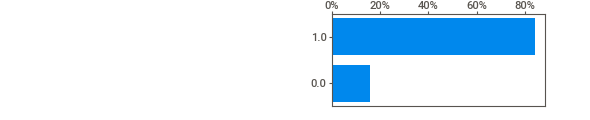
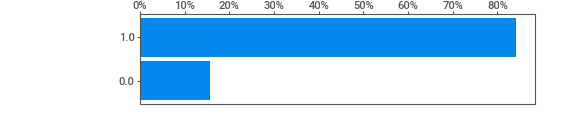
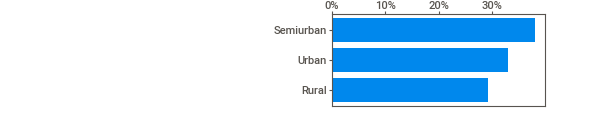
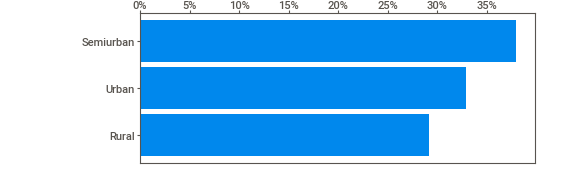
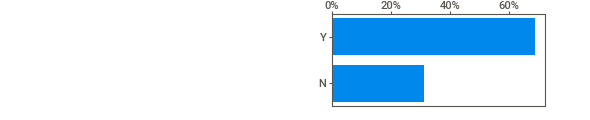
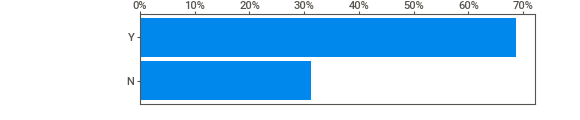
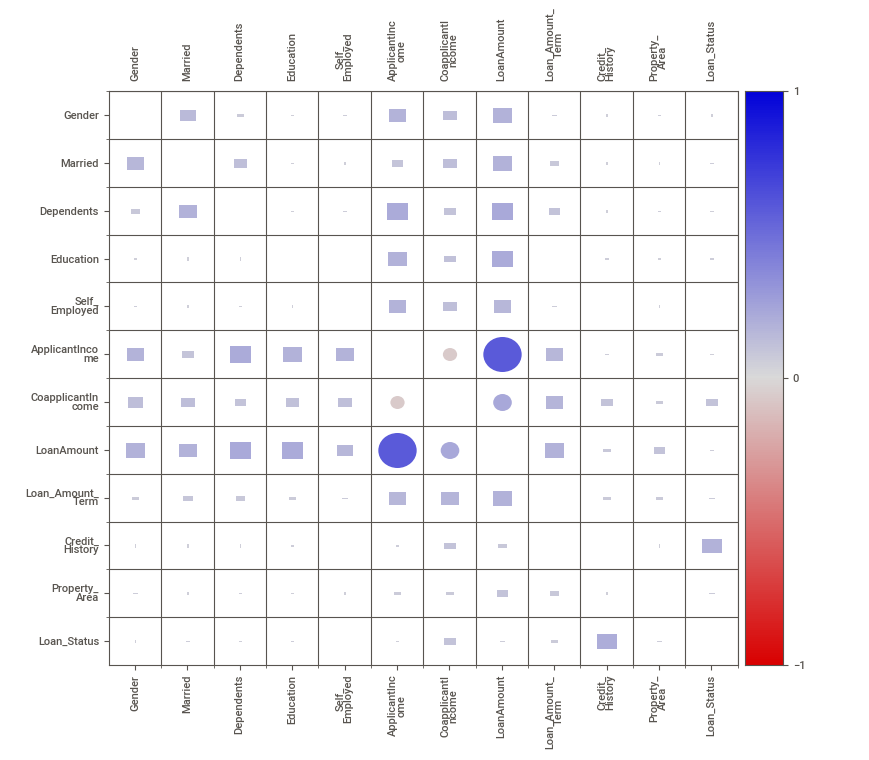
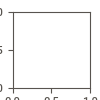

In [7]:
autoEDA = sweetviz.analyze(train)
autoEDA.show_notebook()

**My Own EDA**

In [8]:
# Get the number of records and fields for the historical dataset
num_records = len(train)
num_fields = len(train.columns)

# Print the results
print("Number of records:", num_records)
print("Number of fields:", num_fields)

Number of records: 614
Number of fields: 13


In [9]:
# Get the number of records and fields for the unseen data
num_records = len(test)
num_fields = len(test.columns)

# Print the results
print("Number of records:", num_records)
print("Number of fields:", num_fields)

Number of records: 367
Number of fields: 12


In [10]:
# Get the data types of the fields in the historical dataset
field_types = train.dtypes

# Print the results
print("Data types:")
print(field_types)

Data types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [11]:
# Get the data types of the fields in the unseen data
field_types = test.dtypes

# Print the results
print("Data types:")
print(field_types)

Data types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


In [12]:
# Check for missing values in the train and test datasets
train_missing = train.isnull().sum()
test_missing = test.isnull().sum()

# Print the results
print("Missing values in train dataset:")
print(train_missing)

print("Missing values in test dataset:")
print(test_missing)

# Check for duplicated records in the train and test datasets
train_duplicated = train.duplicated().sum()
test_duplicated = test.duplicated().sum()

# Print the results
print("Duplicated records in train dataset:")
print(train_duplicated)

print("Duplicated records in test dataset:")
print(test_duplicated)

# Check the data types of the fields in the train and test datasets
train_dtypes = train.dtypes
test_dtypes = test.dtypes

# Print the results
print("Data types in train dataset:")
print(train_dtypes)

print("Data types in test dataset:")
print(test_dtypes)

Missing values in train dataset:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values in test dataset:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
Duplicated records in train dataset:
0
Duplicated records in test dataset:
0
Data types in train dataset:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64


In [13]:
#how do loan statuses compare
# Check the distribution of values of loan status
counts = df["Loan_Status"].value_counts()

# Print the results
print(counts)

Y    422
N    192
Name: Loan_Status, dtype: int64


In [14]:
#How men and women compare when it comes to defaulting of loans
# create a cross-tabulation table that shows the frequency of each combination of values in the 'Gender' and 'Loan_Status' columns
crosstab = pd.crosstab(train['Gender'], train['Loan_Status'])

# display the cross-tabulation table
crosstab

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [15]:
# How many loan applicants have dependents based on historical dataset
# In the dependents columnReplace '+' with an empty string
train['Dependents'] = train['Dependents'].str.replace('+', '')
# Convert the values to numeric
train['Dependents'] = pd.to_numeric(train['Dependents'], errors='coerce')

# Create the mask
mask = train['Dependents'].gt(0)

# Select the rows using the mask
selected_rows = train[mask]
num_rows = len(selected_rows)
print(num_rows)


254


<ipython-input-15-ce6d9d16e722>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['Dependents'] = train['Dependents'].str.replace('+', '')


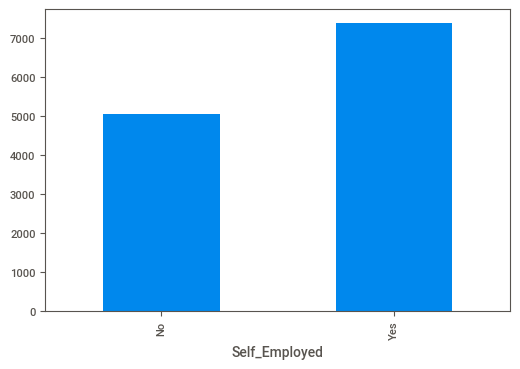

In [16]:
#how incomes of the employed sompare with the self-employed
# group the data by employment status
grouped = train.groupby("Self_Employed")

# calculate the average income for each group
mean_incomes = grouped["ApplicantIncome"].mean()

# plot the results
mean_incomes.plot.bar()
plt.show()



In [17]:
#are applicants with credit history more likely to default
# Group the data by the Credit_History column
grouped_train = train.groupby('Credit_History')

# Count the number of rows in each group
counts = grouped_train.count()

# Count the number of loans with a Loan_Status of N in each group
status_counts = grouped_train['Loan_Status'].value_counts()

# Calculate the percentage of loans with a Loan_Status of N for each Credit_History group
percentages = status_counts / counts['Loan_Status']

print(percentages)

Credit_History  Loan_Status
0.0             N              0.921348
                Y              0.078652
1.0             Y              0.795789
                N              0.204211
Name: Loan_Status, dtype: float64


Based on historical dataset, applicants with a credit history are far less likely to default compared to those without a credit history because 20.42% of applicants with a credit history defaulted whereas 92.14% of candidates without a credit history defaulted

0.5709090389885666


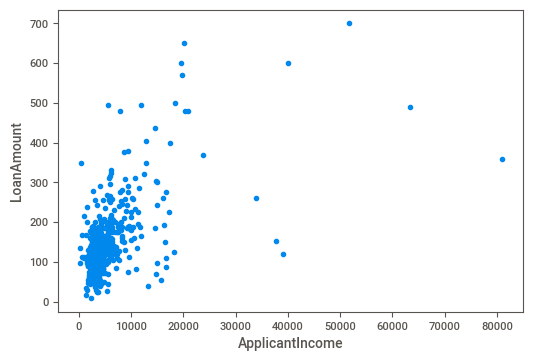

In [18]:
# Calculate the Pearson correlation coefficient between ApplicantIncome and LoanAmount
corr = train['ApplicantIncome'].corr(train['LoanAmount'])

print(corr)


# Create a scatter plot of ApplicantIncome versus LoanAmount
plt.scatter(train['ApplicantIncome'], train['LoanAmount'])
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

From the results, there is a fairly good correlation between the applicant's income & the loan amount

**My Own Answers**


1. What is the number of records, fields and their data types for both the historical datset and unseen data

**Number of records & fields in the historical dataset**

Number of records: 614

Number of fields: 13

**Number of Records & fields in the unseen data**

Number of records: 367

Number of fields: 12

**Datatypes in the historical dataset**

Data types:

Loan_ID               object

Gender                object

Married               object

Dependents           float64

Education             object

Self_Employed         object

ApplicantIncome        int64

CoapplicantIncome    float64

LoanAmount           float64

Loan_Amount_Term     float64

Credit_History       float64

Property_Area         object

Loan_Status           object

**Datatypes in the unseen data**

Data types:

Loan_ID               object

Gender                object

Married               object

Dependents            object

Education             object

Self_Employed         object

ApplicantIncome        int64

CoapplicantIncome      int64

LoanAmount           float64

Loan_Amount_Term     float64

Credit_History       float64

Property_Area         object

2. What data quality issue exists for both train & test? (Comment on any missing values or duplicates

**Missing values in train dataset**

Loan_ID               0

Gender               13

Married               3

Dependents           15

Education             0

Self_Employed        32

ApplicantIncome       0

CoapplicantIncome     0

LoanAmount           22

Loan_Amount_Term     14

Credit_History       50

Property_Area         0

Loan_Status           0

**Missing values in test dataset**

Loan_ID               0

Gender               11

Married               0

Dependents           10

Education             0
Self_Employed        23

ApplicantIncome       0

CoapplicantIncome     0

LoanAmount            5

Loan_Amount_Term      6

Credit_History       29

Property_Area         0

**Duplicated records in train dataset**

0

**Duplicated records in test dataset**

0

3. How do the loan statuses compare? What is that distribution of each?

Y    422
N    192

422 applicants repaid their loans while 192 applicants defaulted

4. How do men & women compare when it comes to defaulting of loans in the historical dataset?

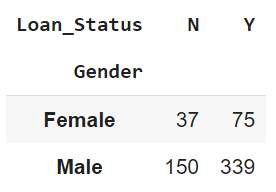

4.05 men default on loans for every 1 woman that defaults

5. How many of the loan applicants have dependents based on the historical dataset?

254

6. How do the incomes of those who are employed compare to those who are self-employed based on the historical dataset?

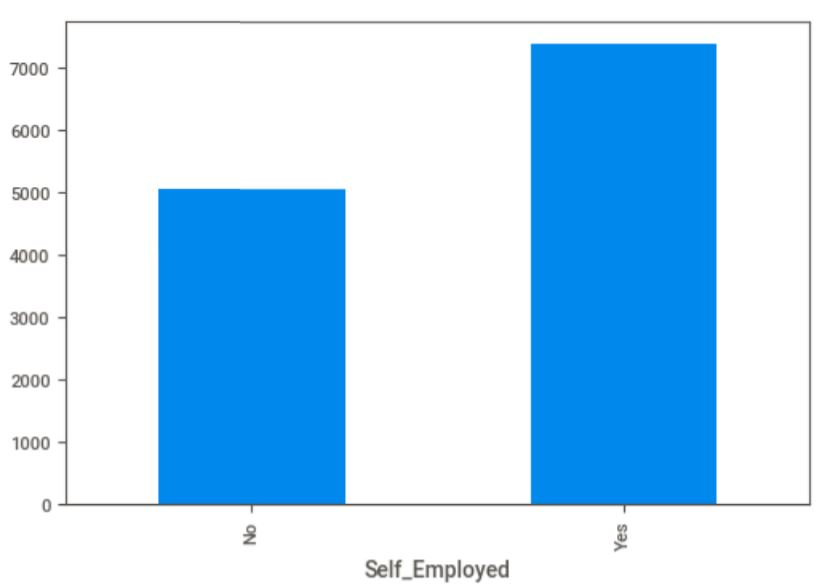


The self-employed have a highee average income of about 7500.The employedhowever have a lower average income of 5000

7. Are applicants with a credit history more likely to default than those who do not have one?

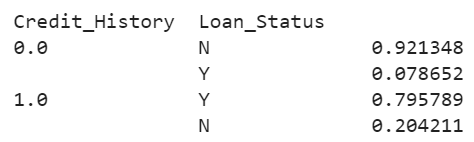

Based on historical dataset, applicants with a credit history are far less likely to default compared to those without a credit history because 20.42% of applicants with a credit history defaulted whereas 92.14% of candidates without a credit history defaulted

8. Is there a correlation between the applicant's income and the loan amount they applied for?


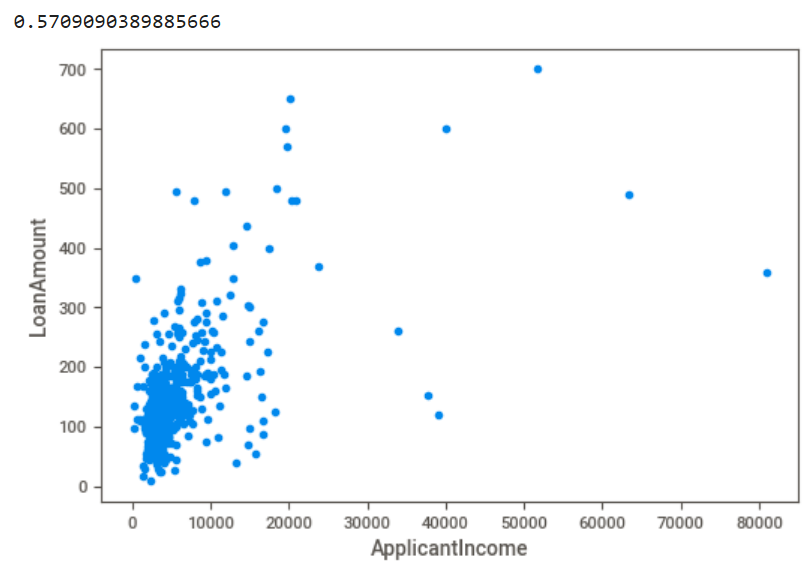

From the results, there is a fairly good correlation between the applicant's income & the loan amount

**Part Two**

**Auto ML with autosklearn**

In [19]:

# Remove rows with missing values
train = train.dropna()
# Matrix of features

X = train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

# convert string(text) to categorical
X.loc[:, 'Gender'] = X['Gender'].astype('category')
X.loc[:, 'Married'] = X['Married'].astype('category')
X.loc[:, 'Education'] = X['Education'].astype('category')
X.loc[:, 'Dependents'] = X['Dependents'].astype('category')
X.loc[:, 'Self_Employed'] = X['Self_Employed'].astype('category')
X.loc[:, 'Property_Area'] = X['Property_Area'].astype('category')


# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""

The first block of code creates a matrix X of features from a dataset stored in a variable called train. The features in the matrix are 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', and 'Property_Area'.

The second block of code converts the data type of the categorical columns (i.e., columns with string values representing categories) in the X matrix to the category data type. This is often done in order to save memory and make it easier to work with the data.

The third block of code creates a target variable y from the 'Loan_Status' column of the train dataset. The values in the 'Loan_Status' column are mapped to 0 for 'N' and 1 for 'Y', and the data type of the resulting y variable is set to int.

The fourth block of code splits the X and y variables into training and test sets using the train_test_split() function from the sklearn library. The test set will be 20% of the data and the training set will be the remaining 80%. The random_state parameter is set to 42, which means that the split will be deterministic (i.e., the same split will be obtained each time the code is run with a value of 42). This can be useful for reproducibility.

"""

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


"\n\nThe first block of code creates a matrix X of features from a dataset stored in a variable called train. The features in the matrix are 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', and 'Property_Area'.\n\nThe second block of code converts the data type of the categorical columns (i.e., columns with string values representing categories) in the X matrix to the category data type. This is often done in order to save memory and make it easier to work with the data.\n\nThe third block of code creates a target variable y from the 'Loan_Status' column of the train dataset. The values in the 'Loan_Status' column are mapped to 0 for 'N' and 1 for 'Y', and the data type of the resulting y variable is set to int.\n\nThe fourth block of code splits the X and y variables into training and test sets using the train_test_split() function from the sklearn library. The test set will be 

In [20]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

"""
This code is using the AutoSklearnClassifier class from the autosklearn library to train a machine learning model for classification. The fit method is used to train the model on a training dataset, which consists of input data X_train and corresponding labels y_train.

The time_left_for_this_task and per_run_time_limit parameters specify time limits for the training process. The n_jobs parameter specifies the number of parallel jobs to run, which can speed up the training process.

After training the model, the code uses the predict method to generate predictions for the test dataset X_test. The resulting predictions are stored in the predictions_autoML variable.
"""

'\nThis code is using the AutoSklearnClassifier class from the autosklearn library to train a machine learning model for classification. The fit method is used to train the model on a training dataset, which consists of input data X_train and corresponding labels y_train.\n\nThe time_left_for_this_task and per_run_time_limit parameters specify time limits for the training process. The n_jobs parameter specifies the number of parallel jobs to run, which can speed up the training process.\n\nAfter training the model, the code uses the predict method to generate predictions for the test dataset X_test. The resulting predictions are stored in the predictions_autoML variable.\n'

In [21]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.8229166666666666


In [22]:
print(confusion_matrix(predictions_autoML, y_test))

[[11  0]
 [17 68]]


**Bespoke ML**

**Data Preparation**

In [23]:
# Matrix of numerical features
df = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]


### Handle Missing Values Here ###
df.dropna()
### Scale Here ###

std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()
# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)
 # encode with get dummies
X = pd.DataFrame(df, columns=df_scaled.columns)
X = pd.get_dummies(X, drop_first=True)
# Join the dataframes horizontally
# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaled Dataset Using StandardScaler


In [24]:
from inspect import isclass

# Import LogisticRegression classifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV, SGDClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, Product
kernel = Product(RBF(), ConstantKernel())
# Import RandomForestClassifier classifier
#!pip install -U scikit-learn
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from sklearn.calibration import CalibratedClassifierCV
from sklearn.multioutput import ClassifierChain, MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading, SelfTrainingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, RFECV
# Import SVC classifier
from sklearn.svm import SVC, NuSVC 
classifiers = [LogisticRegression, RandomForestClassifier, GradientBoostingClassifier, SVC, AdaBoostClassifier, BaggingClassifier,
               BayesianGaussianMixture, BernoulliNB, CalibratedClassifierCV, CategoricalNB, ClassifierChain, ComplementNB, DecisionTreeClassifier,
               DummyClassifier, ExtraTreeClassifier, ExtraTreesClassifier, GaussianMixture, GaussianNB, GaussianProcessClassifier, GridSearchCV,
               HalvingGridSearchCV, HalvingRandomSearchCV, KNeighborsClassifier, LabelPropagation, LabelSpreading,
               LinearDiscriminantAnalysis, LogisticRegressionCV, MLPClassifier, MultiOutputClassifier, MultinomialNB, NuSVC, OneVsRestClassifier,
               Pipeline, QuadraticDiscriminantAnalysis, RFE, RFECV, RadiusNeighborsClassifier, RandomizedSearchCV, SGDClassifier,
               SelfTrainingClassifier, StackingClassifier, VotingClassifier]
print(len(classifiers))
for classifier in classifiers:
    if hasattr(classifier, 'predict_proba'):
        print(classifier.__name__)

42
LogisticRegression
RandomForestClassifier
GradientBoostingClassifier
SVC
AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GridSearchCV
HalvingGridSearchCV
HalvingRandomSearchCV
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RadiusNeighborsClassifier
RandomizedSearchCV
SGDClassifier
SelfTrainingClassifier
StackingClassifier
VotingClassifier


In [25]:
# train
clf = LogisticRegression() #change model here
clf.fit(X_train, y_train)

# predict
predictions_clf = clf.predict(X_test)

In [26]:
print('Model Accuracy:', accuracy_score(predictions_clf, y_test))

Model Accuracy: 0.8229166666666666


In [27]:
print(confusion_matrix(predictions_clf, y_test))

[[11  0]
 [17 68]]


In [28]:
# train
RfC = RandomForestClassifier() #change model here
RfC.fit(X_train, y_train)

# predict
predictions_RfC = RfC.predict(X_test)

In [29]:
print('Model Accuracy:', accuracy_score(predictions_RfC, y_test))

Model Accuracy: 0.7916666666666666


In [30]:
print(confusion_matrix(predictions_RfC, y_test))

[[13  5]
 [15 63]]


In [31]:

# train
GbF = GradientBoostingClassifier() #change model here
GbF.fit(X_train, y_train)

# predict
predictions_GbF = GbF.predict(X_test)

In [32]:
print('Model Accuracy:', accuracy_score(predictions_GbF, y_test))

Model Accuracy: 0.8020833333333334


In [33]:
print(confusion_matrix(predictions_GbF, y_test))

[[13  4]
 [15 64]]


In [34]:
# train
svc = SVC() #change model here
svc.fit(X_train, y_train)

# predict
predictions_svc = svc.predict(X_test)

In [35]:
print('Model Accuracy:', accuracy_score(predictions_svc, y_test))

Model Accuracy: 0.7083333333333334


In [36]:
print(confusion_matrix(predictions_svc, y_test))

[[ 0  0]
 [28 68]]


In [37]:
# train
adc = AdaBoostClassifier() #change model here
adc.fit(X_train, y_train)

# predict
predictions_adc = adc.predict(X_test)

In [38]:
print('Model Accuracy:', accuracy_score(predictions_adc, y_test))

Model Accuracy: 0.7604166666666666


In [39]:
print(confusion_matrix(predictions_adc, y_test))

[[10  5]
 [18 63]]


In [40]:
# train
bc = BaggingClassifier() #change model here
bc.fit(X_train, y_train)

# predict
predictions_bc = bc.predict(X_test)

In [41]:
print('Model Accuracy:', accuracy_score(predictions_bc, y_test))

Model Accuracy: 0.7916666666666666


In [42]:
print(confusion_matrix(predictions_bc, y_test))

[[14  6]
 [14 62]]


In [43]:
# train
bgm = BayesianGaussianMixture() #change model here
bgm.fit(X_train, y_train)

# predict
predictions_bgm = bgm.predict(X_test)

In [44]:
print('Model Accuracy:', accuracy_score(predictions_bgm, y_test))

Model Accuracy: 0.2916666666666667


In [45]:
print(confusion_matrix(predictions_bgm, y_test))

[[28 68]
 [ 0  0]]


In [46]:
# train
bNB = BernoulliNB() #change model here
bNB.fit(X_train, y_train)

# predict
predictions_bNB = bNB.predict(X_test)

In [47]:
print('Model Accuracy:', accuracy_score(predictions_bNB, y_test))

Model Accuracy: 0.8229166666666666


In [48]:
print(confusion_matrix(predictions_bNB, y_test))

[[11  0]
 [17 68]]


In [49]:
# train
ccCV = CalibratedClassifierCV() #change model here
ccCV.fit(X_train, y_train)

# predict
predictions_ccCV = ccCV.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [50]:
print('Model Accuracy:', accuracy_score(predictions_ccCV, y_test))

Model Accuracy: 0.7083333333333334


In [51]:
print(confusion_matrix(predictions_ccCV, y_test))

[[ 0  0]
 [28 68]]


In [52]:
# train
coNB = ComplementNB() #change model here
coNB.fit(X_train, y_train)

# predict
predictions_coNB = coNB.predict(X_test)

In [53]:
print('Model Accuracy:', accuracy_score(predictions_coNB, y_test))

Model Accuracy: 0.4791666666666667


In [54]:
print(confusion_matrix(predictions_coNB, y_test))

[[ 8 30]
 [20 38]]


In [55]:
# train
dt = DecisionTreeClassifier() #change model here
dt.fit(X_train, y_train)

# predict
predictions_dt = dt.predict(X_test)

In [56]:
print('Model Accuracy:', accuracy_score(predictions_dt, y_test))

Model Accuracy: 0.7083333333333334


In [57]:
print(confusion_matrix(predictions_dt, y_test))

[[13 13]
 [15 55]]


In [58]:
# train
dc = DummyClassifier() #change model here
dc.fit(X_train, y_train)

# predict
predictions_dc = dc.predict(X_test)

In [59]:
print('Model Accuracy:', accuracy_score(predictions_dc, y_test))

Model Accuracy: 0.7083333333333334


In [60]:
print(confusion_matrix(predictions_dc, y_test))

[[ 0  0]
 [28 68]]


In [61]:
# train
etc = ExtraTreeClassifier() #change model here
etc.fit(X_train, y_train)

# predict
predictions_etc = etc.predict(X_test)

In [62]:
print('Model Accuracy:', accuracy_score(predictions_etc, y_test))

Model Accuracy: 0.7708333333333334


In [63]:
print(confusion_matrix(predictions_etc, y_test))

[[16 10]
 [12 58]]


In [64]:
# train
ets = ExtraTreesClassifier() #change model here
ets.fit(X_train, y_train)

# predict
predictions_ets = ets.predict(X_test)

In [65]:
print('Model Accuracy:', accuracy_score(predictions_ets, y_test))

Model Accuracy: 0.8020833333333334


In [66]:
print(confusion_matrix(predictions_ets, y_test))

[[14  5]
 [14 63]]


In [67]:
# train
gm = GaussianMixture() #change model here
gm.fit(X_train, y_train)

# predict
predictions_gm = gm.predict(X_test)

In [68]:
print('Model Accuracy:', accuracy_score(predictions_gm, y_test))

Model Accuracy: 0.2916666666666667


In [69]:
print(confusion_matrix(predictions_gm, y_test))

[[28 68]
 [ 0  0]]


In [70]:
# train
gNB = GaussianNB() #change model here
gNB.fit(X_train, y_train)

# predict
predictions_gNB = gNB.predict(X_test)

In [71]:
print('Model Accuracy:', accuracy_score(predictions_gNB, y_test))

Model Accuracy: 0.8125


In [72]:
print(confusion_matrix(predictions_gNB, y_test))

[[12  2]
 [16 66]]


In [73]:
# train
knn = KNeighborsClassifier() #change model here
knn.fit(X_train, y_train)

# predict
predictions_knn = knn.predict(X_test)
#mode, _ = stats.mode(y_train[neigh_ind, k], axis=1, keepdims=True)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [74]:
print('Model Accuracy:', accuracy_score(predictions_knn, y_test))

Model Accuracy: 0.65625


In [75]:
print(confusion_matrix(predictions_knn, y_test))

[[ 5 10]
 [23 58]]


In [76]:
# train
lp = LabelPropagation(kernel='knn') #change model here
lp.fit(X_train, y_train)

# predict
predictions_lp = lp.predict(X_test)

In [77]:
print('Model Accuracy:', accuracy_score(predictions_lp, y_test))

Model Accuracy: 0.6770833333333334


In [78]:
print(confusion_matrix(predictions_lp, y_test))

[[ 5  8]
 [23 60]]


In [79]:
# train
ls = LabelSpreading(kernel='knn') #change model here
ls.fit(X_train, y_train)

# predict
predictions_ls = ls.predict(X_test)

In [80]:
print('Model Accuracy:', accuracy_score(predictions_ls, y_test))

Model Accuracy: 0.6770833333333334


In [81]:
print(confusion_matrix(predictions_ls, y_test))

[[ 5  8]
 [23 60]]


In [82]:
# train
lda = LinearDiscriminantAnalysis() #change model here
lda.fit(X_train, y_train)

# predict
predictions_lda = lda.predict(X_test)

In [83]:
print('Model Accuracy:', accuracy_score(predictions_lda, y_test))

Model Accuracy: 0.8229166666666666


In [84]:
print(confusion_matrix(predictions_lda, y_test))

[[11  0]
 [17 68]]


In [85]:
# train
lrCV = LogisticRegressionCV() #change model here
lrCV.fit(X_train, y_train)

# predict
predictions_lrCV = lrCV.predict(X_test)

In [86]:
print('Model Accuracy:', accuracy_score(predictions_lrCV, y_test))

Model Accuracy: 0.8229166666666666


In [87]:
print(confusion_matrix(predictions_lrCV, y_test))

[[11  0]
 [17 68]]


In [89]:
# train
mlp = MLPClassifier(learning_rate_init=0.7) #change model here
mlp.fit(X_train, y_train)

# predict
predictions_mlp = mlp.predict(X_test)

In [90]:
print('Model Accuracy:', accuracy_score(predictions_mlp, y_test))

Model Accuracy: 0.7083333333333334


In [91]:
print(confusion_matrix(predictions_mlp, y_test))

[[ 0  0]
 [28 68]]


In [92]:
# train
mNB = MultinomialNB() #change model here
mNB.fit(X_train, y_train)

# predict
predictions_mNB = mNB.predict(X_test)

In [94]:
print('Model Accuracy:', accuracy_score(predictions_mNB, y_test))

Model Accuracy: 0.4791666666666667


In [95]:
print(confusion_matrix(predictions_mNB, y_test))

[[ 8 30]
 [20 38]]


In [96]:
# train
nsvc = NuSVC() #change model here
nsvc.fit(X_train, y_train)

# predict
predictions_nsvc = nsvc.predict(X_test)

In [97]:
print('Model Accuracy:', accuracy_score(predictions_nsvc, y_test))

Model Accuracy: 0.5729166666666666


In [98]:
print(confusion_matrix(predictions_nsvc, y_test))

[[13 26]
 [15 42]]


In [99]:
# train
qda = QuadraticDiscriminantAnalysis() #change model here
qda.fit(X_train, y_train)

# predict
predictions_qda = qda.predict(X_test)

In [100]:
print('Model Accuracy:', accuracy_score(predictions_qda, y_test))

Model Accuracy: 0.8229166666666666


In [101]:
print(confusion_matrix(predictions_qda, y_test))

[[12  1]
 [16 67]]


In [102]:
# train
sgd = SGDClassifier() #change model here
sgd.fit(X_train, y_train)

# predict
predictions_sgd = sgd.predict(X_test)

In [103]:
print('Model Accuracy:', accuracy_score(predictions_sgd, y_test))

Model Accuracy: 0.46875


In [104]:
print(confusion_matrix(predictions_sgd, y_test))

[[12 35]
 [16 33]]
